<a href="https://colab.research.google.com/github/ramseshaan/-MyApp/blob/main/Supervised_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library & Mount to Drive

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#2. Load dan Persiapan data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Tugas/MachineLearning/data.csv")
df["zip"] = df["statezip"].str.extract(r'(\d{5})').astype(float)
df = df.drop(columns=["date", "street", "city", "statezip", "country"])
df = df.dropna()
df = df[(df["price"] > 10000) & (df["price"] < 5000000)]

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,98133.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,98052.0


#3. Pisahkan Fitur dan Target

In [3]:
X = df.drop(columns=["price"])
y = df["price"]

print("Fitur X")
print( X.head())

print("Fitur Y")
print( y.head())

Fitur X
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.50         1340      7912     1.5           0     0   
1       5.0       2.50         3650      9050     2.0           0     4   
2       3.0       2.00         1930     11947     1.0           0     0   
3       3.0       2.25         2000      8030     1.0           0     0   
4       4.0       2.50         1940     10500     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated      zip  
0          3        1340              0      1955          2005  98133.0  
1          5        3370            280      1921             0  98119.0  
2          4        1930              0      1966             0  98042.0  
3          4        1000           1000      1963             0  98008.0  
4          4        1140            800      1976          1992  98052.0  
Fitur Y
0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: pr

#3. Normalisasi Fitur

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Fitur X setelah di-normalisasi")
print(X_scaled[:5])

Fitur X setelah di-normalisasi
[[-0.43654015 -0.84412242 -0.83388125 -0.19236866 -0.0230748  -0.08011722
  -0.30639638 -0.66732026 -0.5662404  -0.67184052 -0.53114563  1.22192494
   1.01165598]
 [ 1.77510113  0.44517037  1.60095521 -0.16073487  0.90543078 -0.08011722
   4.92131226  2.298765    1.82170012 -0.06455368 -1.6735861  -0.82550084
   0.74752347]
 [-0.43654015 -0.19947602 -0.21199661 -0.08020494 -0.95158038 -0.08011722
  -0.30639638  0.81572237  0.12779157 -0.67184052 -0.16153253 -0.82550084
  -0.70520534]
 [-0.43654015  0.12284717 -0.13821369 -0.18908853 -0.95158038 -0.08011722
  -0.30639638  0.81572237 -0.96619103  1.49704105 -0.2623361  -0.82550084
  -1.34667002]
 [ 0.66928049  0.44517037 -0.20145619 -0.12042821 -0.95158038 -0.08011722
  -0.30639638  0.81572237 -0.80150548  1.06326473  0.17447937  1.20864986
  -0.51653926]]


#4. Split Data untuk Training dan Testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 3637
Jumlah data uji: 910


#5. Training Model XGBoost

In [7]:
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    random_state=42
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#6. Evaluasi Model


In [8]:
y_pred = model.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

RMSE (Root Mean Squared Error): 212072.43
R² Score: 0.674


#7. Visualisasi Fitur Penting

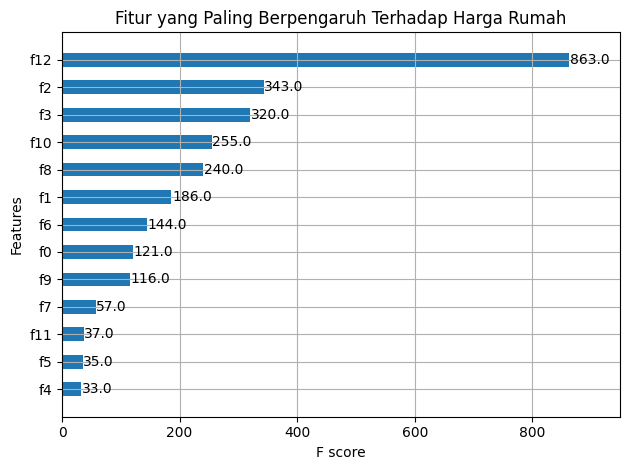

In [9]:
xgb.plot_importance(model, height=0.5)
plt.title("Fitur yang Paling Berpengaruh Terhadap Harga Rumah")
plt.tight_layout()
plt.show()

In [10]:
feature_names = X.columns.tolist()
feature_names_mapping = {f'f{i}': name for i, name in enumerate(feature_names)}

print("Pemetaan fitur F dan nama kolom asli:")
for f_name, col_name in feature_names_mapping.items():
  print(f"{f_name}: {col_name}")

Pemetaan fitur F dan nama kolom asli:
f0: bedrooms
f1: bathrooms
f2: sqft_living
f3: sqft_lot
f4: floors
f5: waterfront
f6: view
f7: condition
f8: sqft_above
f9: sqft_basement
f10: yr_built
f11: yr_renovated
f12: zip
